In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

**random.randn**, normal dağılıma göre rasgele sayılar içeren bir matris oluşturulmaktadır.

**ndim_max** ve **ndim_max** ise matrisin boyutlarını belirlemek 
için kullanılır.

In [4]:
# create random square matrix
ndim_max = 2000
A = np.random.randn(ndim_max,ndim_max)

Birçok boyuttaki matrislerde çarpım işlemi yaparak, boyut artışına bağlı olarak işlem süresindeki değişimi ölçer.

npoint adet boyut uzunluğu belirlenir ve array_ndim dizisinde saklanır. Ardından, sonuçları kaydetmek için array_time adlı bir sıfırlardan oluşan dizi oluşturulur.

In [5]:
# set up list of dimension lengths
npoint = 6
array_ndim = np.linspace(1000,2000,npoint)
# create initial array of zeros for time calculation
array_time = np.zeros((npoint))
# repeat experiment nrun times to smooth out results
nrun = 20
# record time to compute svd of A[0:ndim,0:ndim] over nrun cases
for i in range(npoint):
    ndim = int(array_ndim[i])
    time_start = time.time()
    for count in range(nrun):
        B = np.matmul(A[0:ndim,0:ndim],A[0:ndim,0:ndim])
    time_end = time.time()
    array_time[i] = time_end - time_start

aşağıdaki kodda grafiğe Log data başlığı verilir x ve y eksenleri 
adlandırılır. Ve çizdirilir.

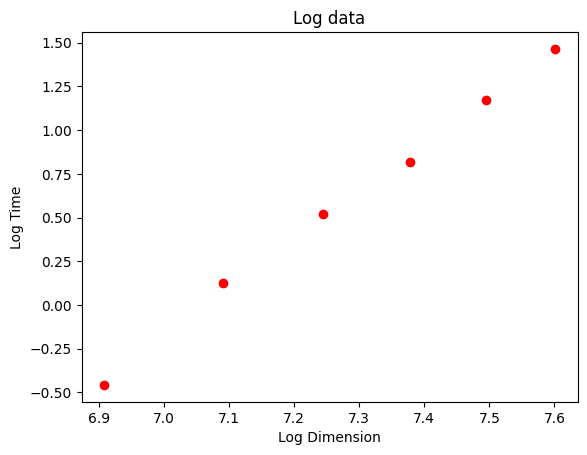

In [6]:
plt.figure()
log_ndim = np.log(array_ndim)
log_time = np.log(array_time)
plt.title("Log data")
plt.xlabel("Log Dimension")
plt.ylabel("Log Time")
plt.plot(log_ndim,log_time,"ro")
plt.show()


 veri setindeki logaritmik boyut ve zaman verilerini, birinci dereceden bir polinom (doğru) ile uyumlu hale getirerek bir grafik üzerinde çizdirir. Bu işlem, verilerin karmaşıklık gücünü belirlemek için kullanılır. Grafik, veri noktalarının kırmızı renkli noktalarla ve doğrunun mavi renkli bir çizgi ile gösterildiği bir pencere oluşturur.


Coefficients: [  2.71428432 -19.16913931]
Complexity power: 2.7142843219366535


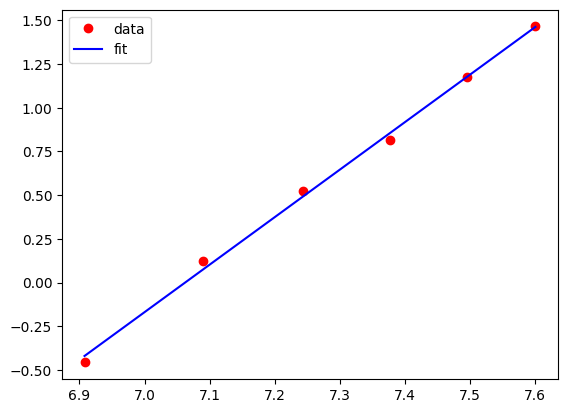

In [7]:
# fit log ndim/log time data to linear function using polyfit input 1 means fit to linear function
coeff = np.polyfit(log_ndim,log_time,1)
print("Coefficients: {}".format(coeff))
print("Complexity power: {}".format(coeff[0]))
# create polynomial(linear function) based on coefficients
p = np.poly1d(coeff)
plt.figure()
# plot log_ndim log_time data
plt.plot(log_ndim,log_time,"ro",label="data")
# plot log_ndim versus polynomial p evaluated at log_ndim points
plt.plot(log_ndim,p(log_ndim),"b-",label="fit")
plt.legend()
plt.show()